Implementing Linear regression from scratch

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [54]:
# Import dataset
df = pd.read_csv("data/Student_Performance.csv")

In [55]:
# Print Dataset
print("Dataset preview")
print(df.head())

Dataset preview
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [80]:
# loading data
x = df.iloc[:800, [1]].to_numpy()
y = df.iloc[:800, 5].to_numpy()
n_samples, features = x.shape

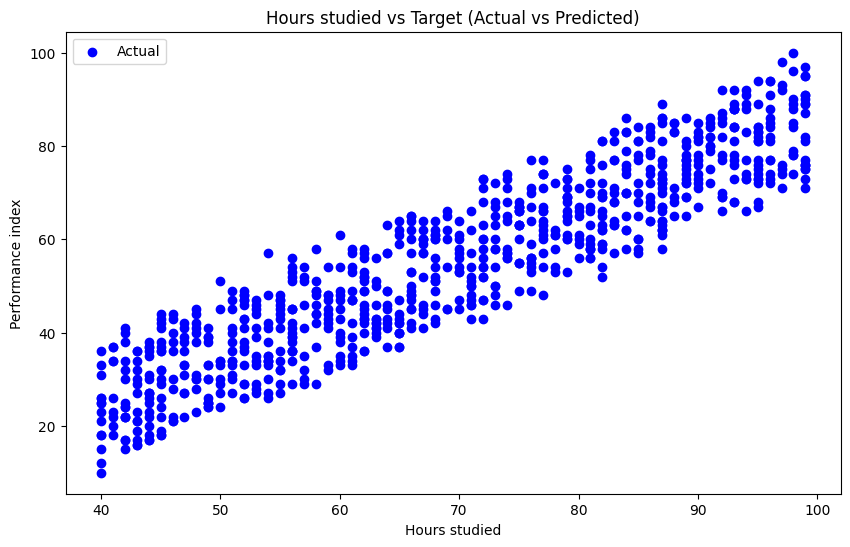

In [84]:
# Plotting dataset

# Feature names (optional)
feature_names = ["Hours studied", "previous scores","Sleep Hours"]

# Loop over each feature
for i in [0]:
    plt.figure(figsize=(10, 6))

    # Actual values
    plt.scatter(x[:, i], y, color="blue", label="Actual")

    # Predicted values
    # plt.scatter(x[:, i], y_pred_test, color="red", label="Predicted")

    plt.xlabel(feature_names[i])
    plt.ylabel("Performance index")
    plt.title(f"{feature_names[i]} vs Target (Actual vs Predicted)")
    plt.legend()
    plt.show()

In [57]:
# Mean Squared Error

def mse(pred_val,true_val ):
  pred_val = np.array(pred_val).flatten()
  true_val = np.array(true_val).flatten()
  return np.mean((pred_val-true_val)**2)
  

In [58]:
# create a model

w = np.zeros(features)
b = 0

epochs =1000
lr = 0.0001


In [ ]:
# gradient descent
for _ in range(epochs):
    y_pred = np.dot(x,w)+b
    dw = -(2 / n_samples) * np.dot(x.T, (y - y_pred))  # shape (n_features,)
    db = -(2 / n_samples) * np.sum(y - y_pred)
    # Update weights and bias
    w -= lr * dw
    b -= lr * db
    

In [61]:
# Evaluate
y_pred = np.dot(x, w) + b
print("Mean Squared Error:")
print(mse(y_pred,y))
print("Learned parameters: w =", w, ", b =", b)

Mean Squared Error:
48.06380488342494
Learned parameters: w = [ 1.48777059  0.72921063 -0.33126426] , b = -0.22900963216825926


In [65]:
# Testing with data
x_new = df.iloc[800:1000,[0,1,4]].to_numpy()
y_new = df.iloc[800:1000, 5].to_numpy()
y_pnew= np.dot(x_new,w) + b
print("Mean Squared Error:")
print(mse(y_pnew, y_new))

Mean Squared Error:
44.61506444200924


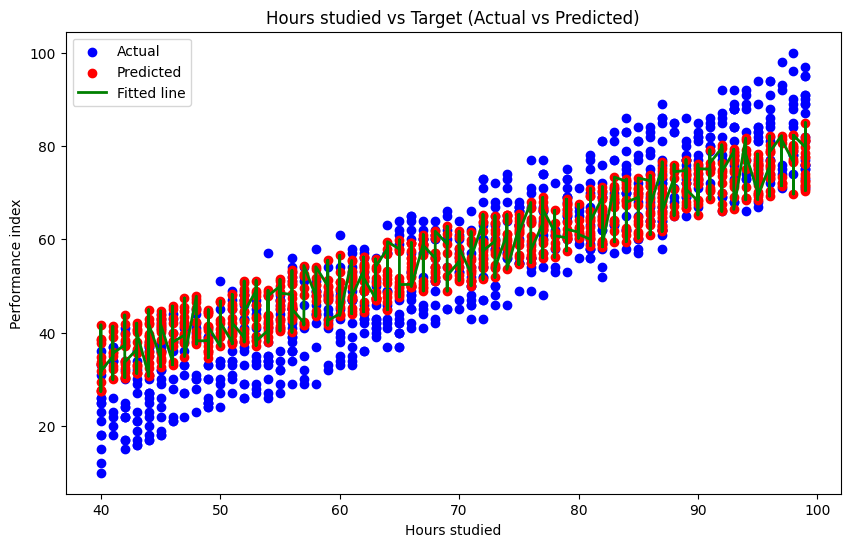

In [87]:
feature_names = ["Hours studied", "previous scores", "Sleep Hours"]

# Loop over each feature
i = 0  # feature index
plt.figure(figsize=(10, 6))

# Actual values
plt.scatter(x[:, i], y, color="blue", label="Actual")

# Predicted values
plt.scatter(x[:, i], y_pred, color="red", label="Predicted")

# Sort x for smooth fitted line
sorted_indices = np.argsort(x[:, i])
plt.plot(
    x[sorted_indices, i],
    y_pred[sorted_indices],
    color="green",
    label="Fitted line",
    linewidth=2,
)

plt.xlabel(feature_names[i])
plt.ylabel("Performance index")
plt.title(f"{feature_names[i]} vs Target (Actual vs Predicted)")
plt.legend()
plt.show()